In [31]:
import px4tools
import pandas
import pylab as pl
from px4tools.analysis import *
from px4tools.mapping import *
from px4tools.ulog import *
from px4tools.px42csv import *
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import math
import os

%matplotlib inline

pl.rcParams['figure.figsize'] = (15,5)
pl.rcParams['lines.linewidth'] = 3
pl.rcParams['font.size'] = 10

In [32]:
# there is another script from px4tools "px42csv" to convert all the px4log files to csv file (python px42csv.py) 
# (take it and put it in the directory of the px4logs and put sdlog2_dump.py in the same directory)and run it, and it will convert everything

# script to go through the csv files and check if they include GPS data 
#fileD = os.curdir + str("/logsFiles/")
#for root, dirs, files in os.walk(fileD):
#    for filename in files:
#        if filename.endswith('.csv'):
#            try:
#                file_path = os.path.abspath(os.path.join(root,filename))
#                data = px4tools.process_data(pandas.read_csv(file_path))
#                gps_x = []
#                for lat in data.GPS_Lat.values:
#                    if(not math.isnan(lat)):
#                        gps_x.append(lat)
#                        break
#                if(len(gps_x)>0):
#                    print(filename)
#                #print(len(data_lpe.GPS_Lat.values))
#                #print(len(data_lpe.GPS_Lon.values))
#            except Exception as e:
#                print(e)
                
# drone 1 location KUSTAR                 
#12_00_09.csv
#14_20_09.csv
#15_20_16.csv
#12_10_29.csv
#12_11_47.csv
#12_08_15.csv
#01_10_20.csv
#15_27_53.csv
#14_48_55.csv
#12_09_28.csv
#05_54_14.csv
#08_36_36.csv
#01_16_31.csv
#14_05_46.csv
#11_34_59.csv
#10_44_57.csv
#05_15_30.csv
#18_09_44.csv
#21_07_37.csv
#06_55_44.csv
#16_20_56.csv

#drone 1 location YAS
#01_20_00.csv

#vader KU
#12_36_45.csv (stabilized)
#12_32_59.csv (stabilized)

In [92]:
#loading data and projecting it
data = px4tools.process_data(pandas.read_csv('drone05_plots_newboard/14_41_42.csv'))
# data_lpe is required to have GPS_X and GPS_Y and GPS_Z (for the analysis part done at the end of this script)
data_lpe = px4tools.project_lat_lon(data)

In [34]:
'''
import webbrowser
try:
    import gmplot
except ImportError:
    print("gmplot is required to plot gps on the map.")
    print("install on ubuntu: pip install gmplot --user")

gps_x = []
gps_y = []
for lat in data.GPS_Lat.values:
    #print(float(lat))
    if(not math.isnan(lat)):
        #print(float(lat))        
        gps_x.append(lat)
for lon in data.GPS_Lon.values:
    #print(float(lon))
    if(not math.isnan(lon)):
        #print(float(lon))        
        gps_y.append(lon)   

print(len(gps_x)) 
print(len(gps_y))        
## Flip gps_x and gps_y below if you are using the LOGS with this problem
gmap = gmplot.GoogleMapPlotter(gps_x[0], gps_y[0], 16)
gmap.plot(gps_x, gps_y, 'red', edge_width=10)
gmap.draw("mymap.html")
webbrowser.open_new_tab('mymap.html')
'''

'\nimport webbrowser\ntry:\n    import gmplot\nexcept ImportError:\n    print("gmplot is required to plot gps on the map.")\n    print("install on ubuntu: pip install gmplot --user")\n\ngps_x = []\ngps_y = []\nfor lat in data.GPS_Lat.values:\n    #print(float(lat))\n    if(not math.isnan(lat)):\n        #print(float(lat))        \n        gps_x.append(lat)\nfor lon in data.GPS_Lon.values:\n    #print(float(lon))\n    if(not math.isnan(lon)):\n        #print(float(lon))        \n        gps_y.append(lon)   \n\nprint(len(gps_x)) \nprint(len(gps_y))        \n## Flip gps_x and gps_y below if you are using the LOGS with this problem\ngmap = gmplot.GoogleMapPlotter(gps_x[0], gps_y[0], 16)\ngmap.plot(gps_x, gps_y, \'red\', edge_width=10)\ngmap.draw("mymap.html")\nwebbrowser.open_new_tab(\'mymap.html\')\n'

In [35]:
px4tools.find_lpe_gains(data[10:100], printing=True);

LPE_LDR_Z	=	0
LPE_BAR_Z	=	0.674
LPE_ACC_XY	=	0
LPE_ACC_Z	=	0
LPE_GPS_XY	=	0
LPE_GPS_Z	=	0
LPE_GPS_VXY	=	0
LPE_GPS_VZ	=	0


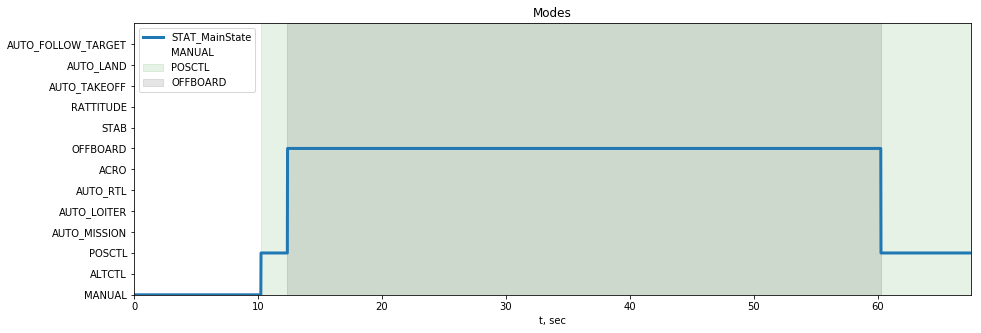

In [93]:
# the plot background colors represent the mode and you can find this color in some of the below plots indicating the mode
px4tools.plot_modes(data)
pl.legend()
pl.title('Modes')

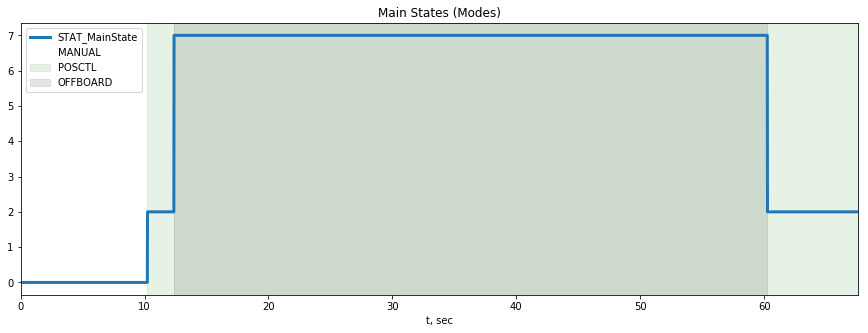

In [37]:
#
data.STAT_MainState.plot()
background_flight_modes(data)
pl.legend()
pl.title('Main States (Modes)')
pl.savefig('Main States (Modes)')

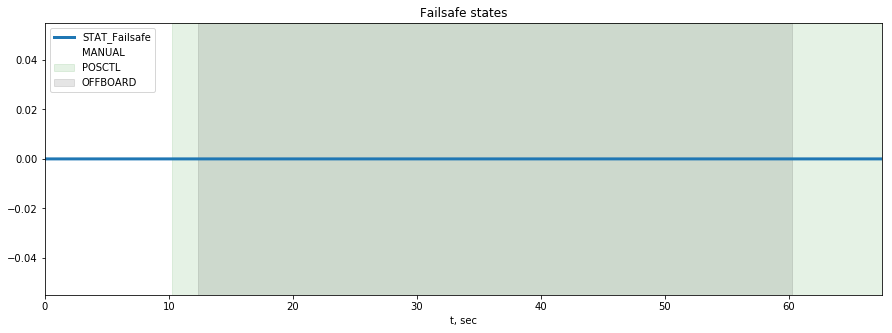

In [38]:
#Throttle Failsafe, GPS Failsafe, GCS Failsafe (ground station failsafe), Battery Failsafe and the Fence
data.STAT_Failsafe.plot()
background_flight_modes(data)
pl.legend()
pl.title('Failsafe states')
pl.savefig('Failsafe states')

In [39]:
process_lpe_health(data) # this is required to be done before timeouts and faults plots since it generates their elements 

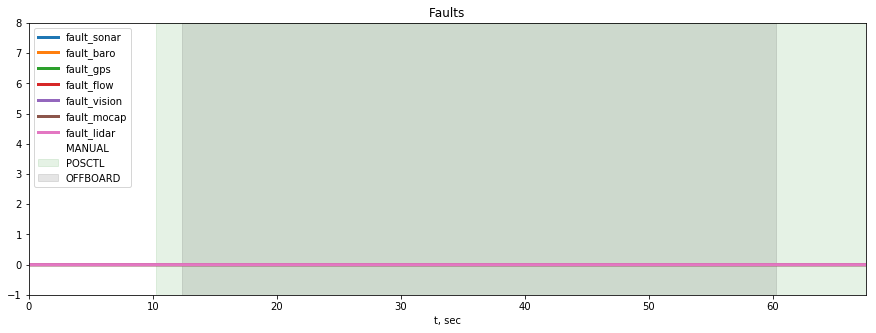

In [40]:
#it requires process_lpe_health(data) to be done before

# 1-->fault_sonar
# 2-->fault_baro
# 3-->fault_gps
# 4-->fault_flow
# 5-->fault_vision
# 6-->fault_mocap
# 7--> fault_lidar
plot_faults(data)
background_flight_modes(data)
pl.legend()
pl.title('Faults')
pl.savefig('faults')

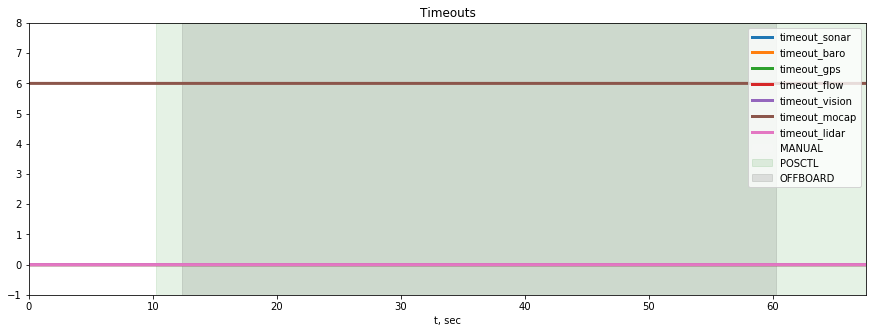

In [41]:
#it requires process_lpe_health(data) to be done before

# 1-->timeout_sonar
# 2-->timeout_baro
# 3-->timeout_gps
# 4-->timeout_flow
# 5-->timeout_vision
# 6-->timeout_mocap
# 7--> timeout_lidar
plot_timeouts(data)
background_flight_modes(data)
pl.legend()
pl.title('Timeouts')
pl.savefig('timeouts')

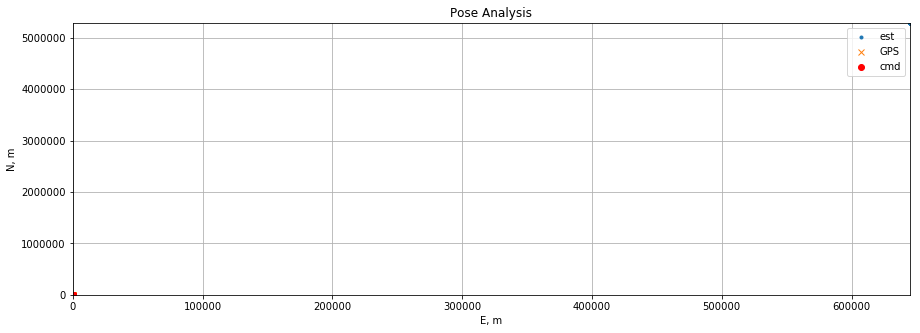

In [42]:
px4tools.pos_analysis(data_lpe[1:9000]);
pl.title('Pose Analysis')

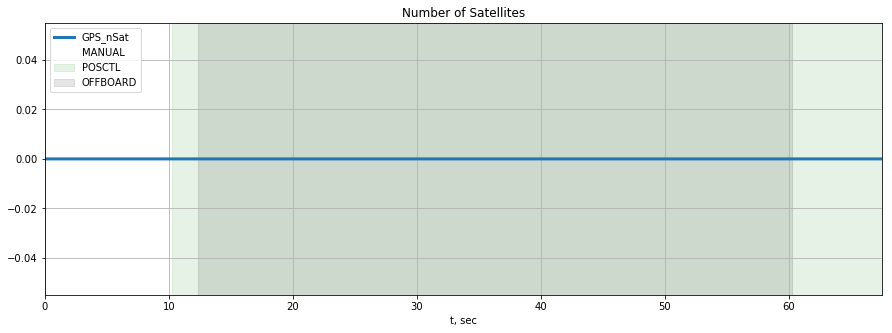

In [43]:
data.GPS_nSat.plot()
background_flight_modes(data)
pl.legend()
pl.grid()
pl.title('Number of Satellites')
pl.savefig('Number of Satellites')

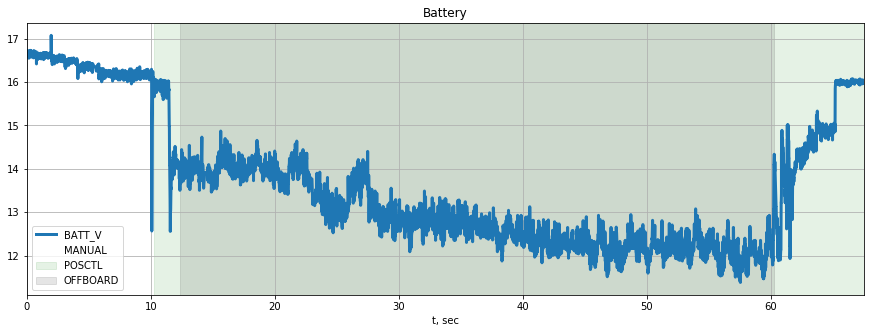

In [44]:
data.BATT_V.plot()
background_flight_modes(data)
pl.legend()
pl.grid()
pl.title('Battery')
pl.savefig('Battery')

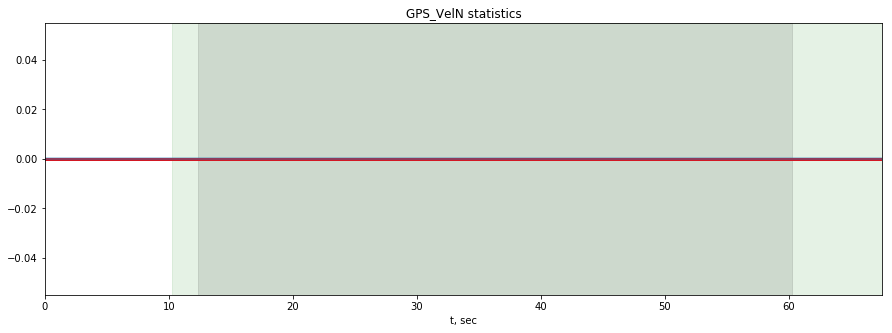

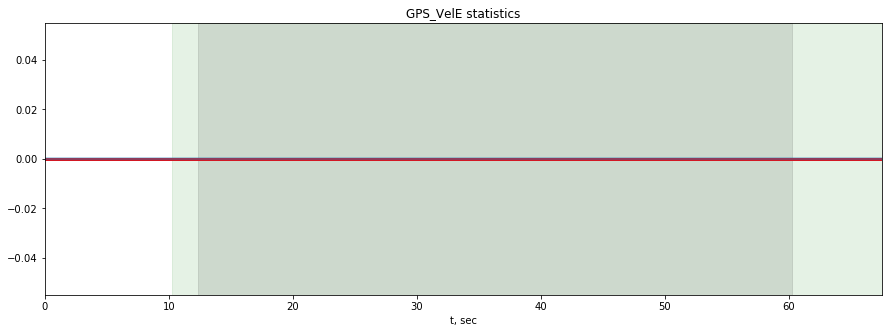

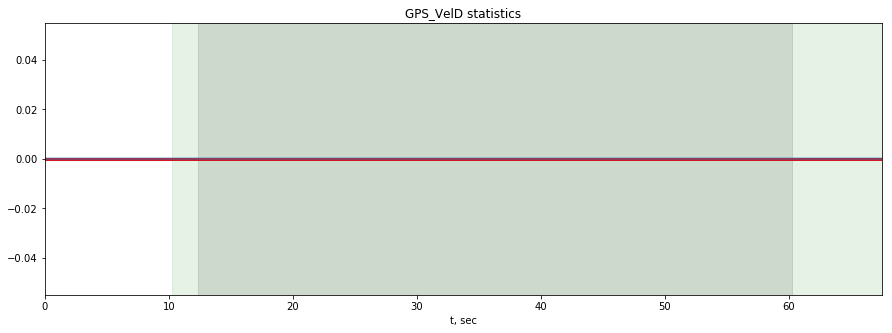

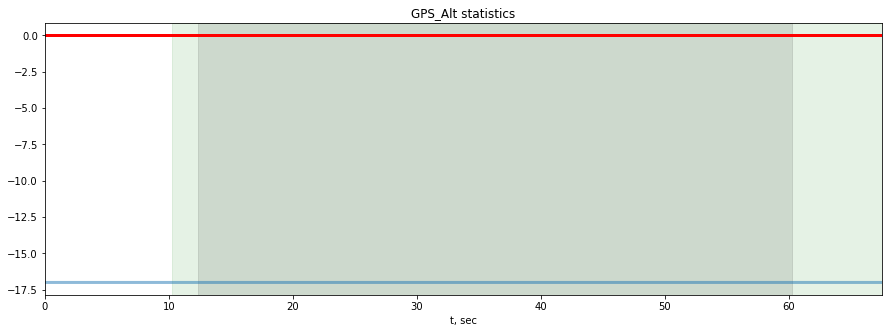

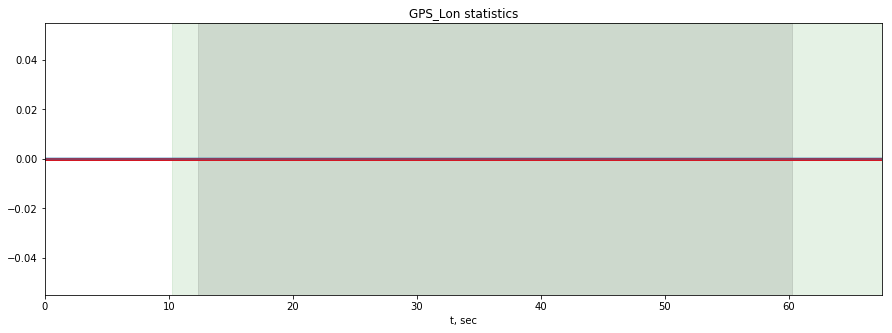

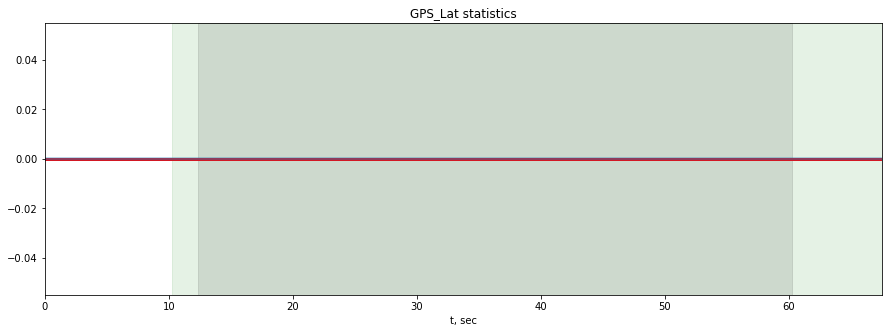

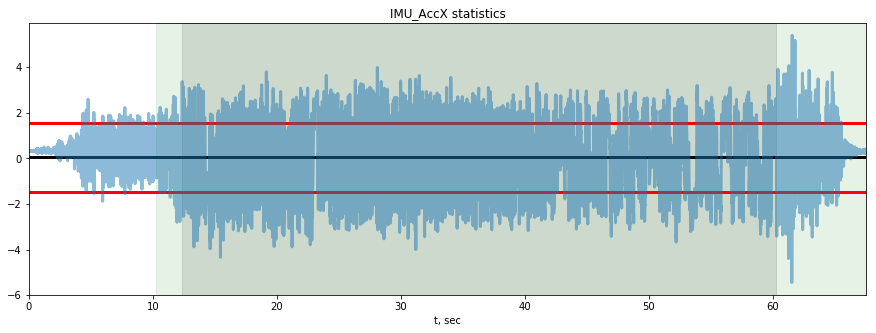

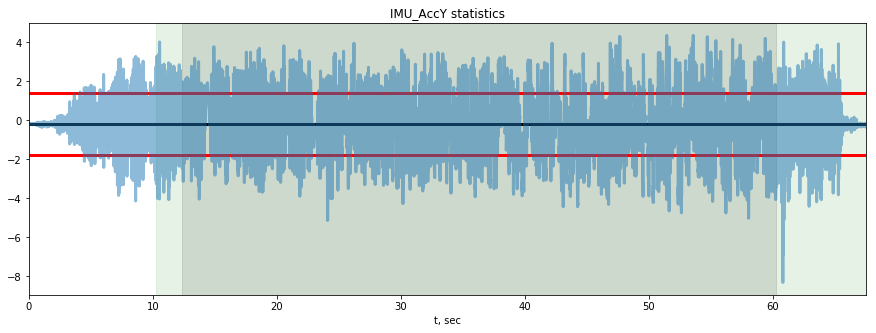

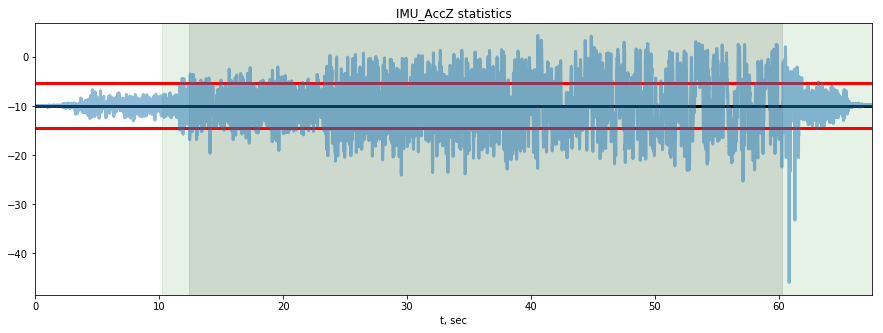

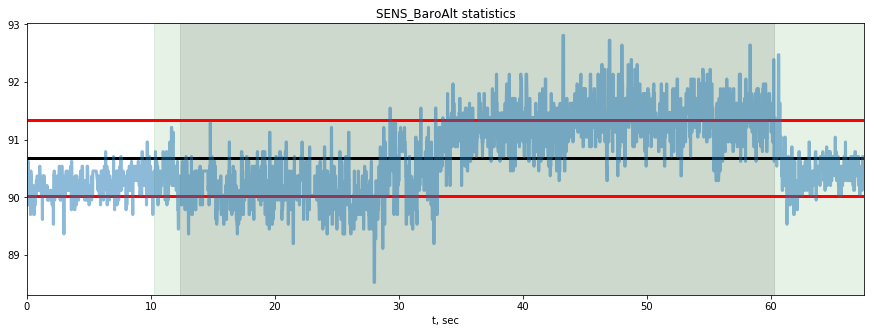

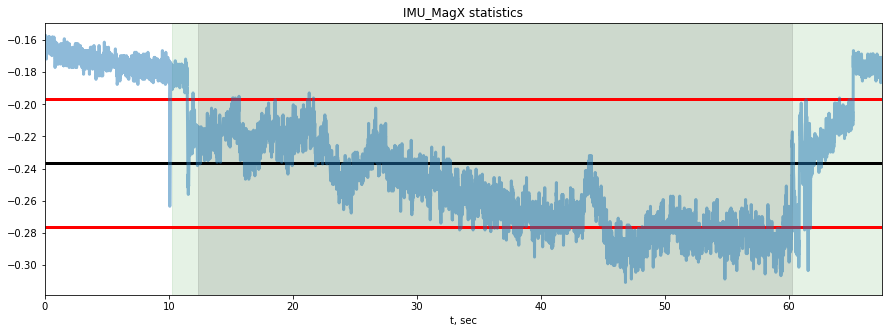

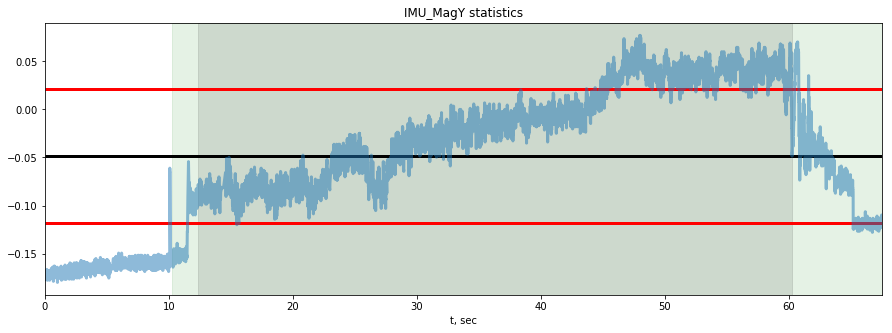

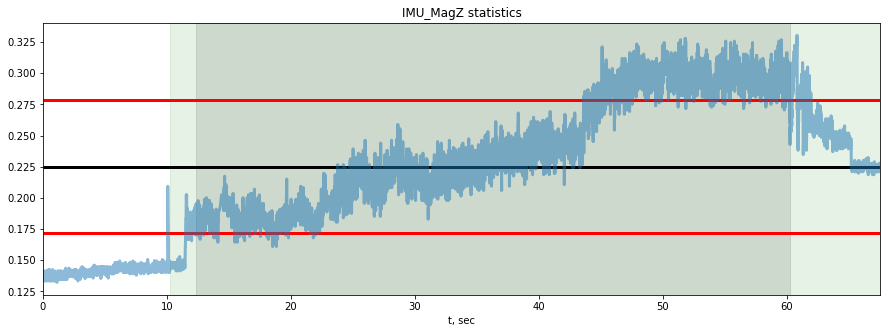

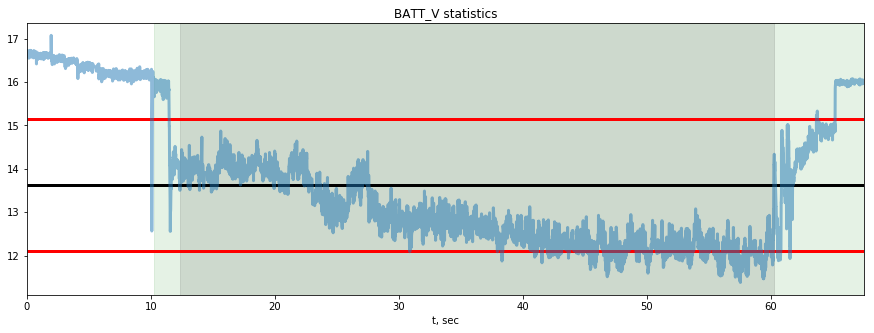

In [45]:
#AccX and Accy ranges should be [-300;+300]
#Accz should be [-500;-1500]
px4tools.statistics(data, [
        'GPS_VelN', 'GPS_VelE', 'GPS_VelD',
        'GPS_Alt', 'GPS_Lon', 'GPS_Lat',
        'IMU_AccX', 'IMU_AccY', 'IMU_AccZ', 'SENS_BaroAlt','IMU_MagX','IMU_MagY','IMU_MagZ','BATT_V'], plot=True, save=True);

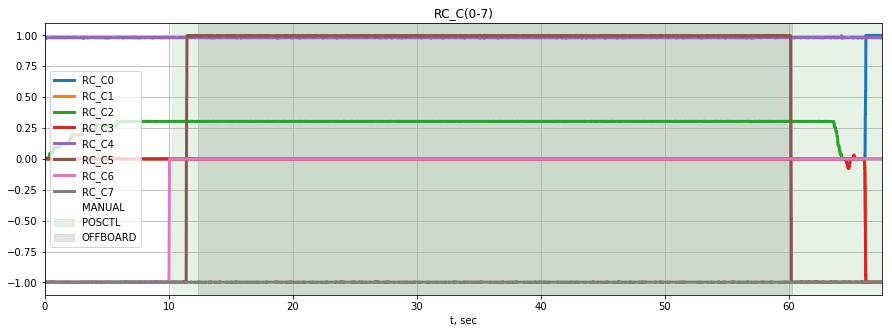

In [46]:
data.RC_C0.plot()
data.RC_C1.plot()
data.RC_C2.plot()
data.RC_C3.plot()
data.RC_C4.plot()
data.RC_C5.plot()
data.RC_C6.plot()
data.RC_C7.plot()
background_flight_modes(data)
pl.legend()
pl.grid()
pl.title('RC_C(0-7)')
pl.savefig('RC_C(0-7)')

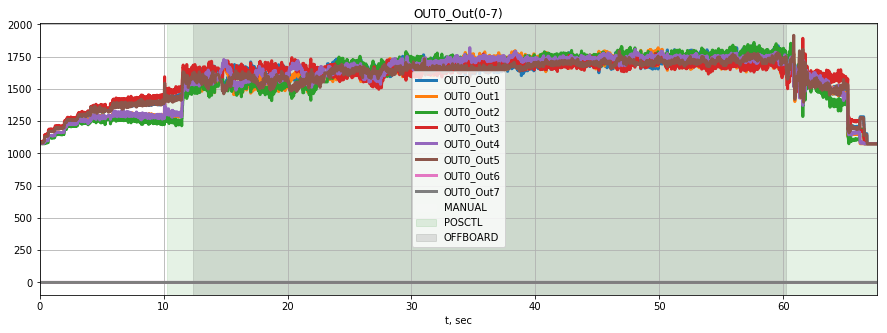

In [47]:
data.OUT0_Out0.plot()
data.OUT0_Out1.plot()
data.OUT0_Out2.plot()
data.OUT0_Out3.plot()
data.OUT0_Out4.plot()
data.OUT0_Out5.plot()
data.OUT0_Out6.plot()
data.OUT0_Out7.plot()
background_flight_modes(data)
pl.legend()
pl.grid()
pl.title('OUT0_Out(0-7)')
pl.savefig('OUT0_Out(0-7)')

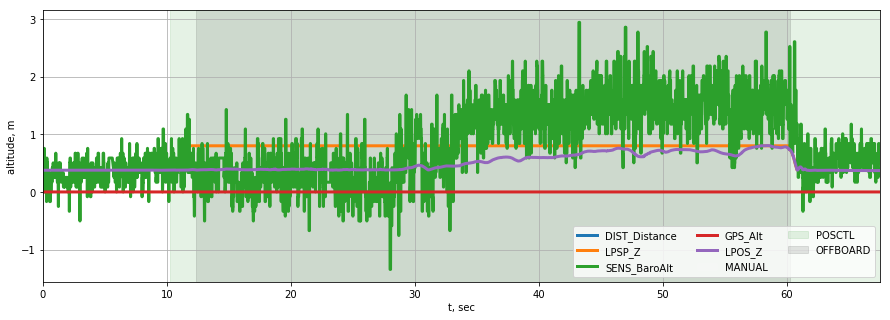

In [48]:
px4tools.alt_analysis(data);

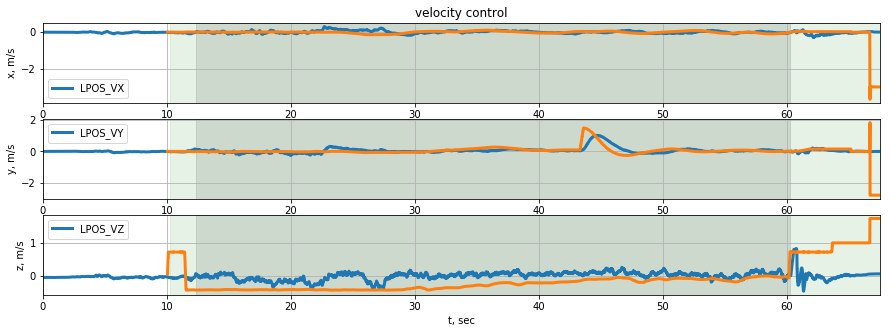

In [49]:
px4tools.plot_velocity_loops(data)
pl.savefig('velocity loops')

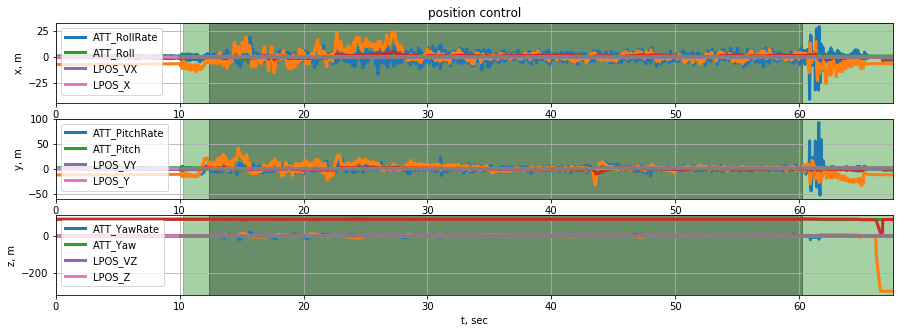

In [50]:
px4tools.plot_control_loops(data)
pl.savefig('control loops')

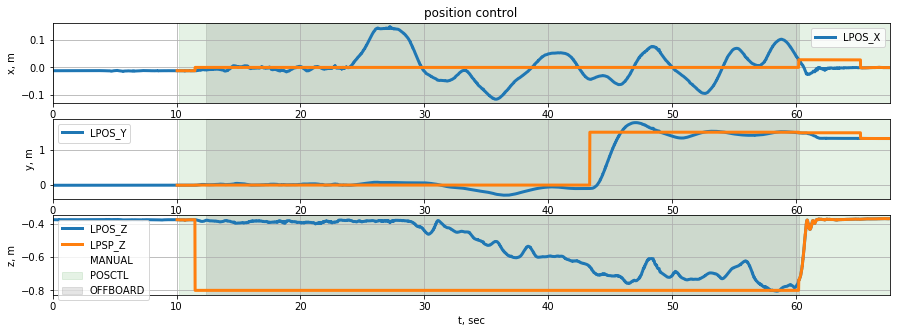

In [51]:
px4tools.plot_position_loops(data)#data[data.STAT_MainState==2]
pl.legend()
pl.savefig('position loops')

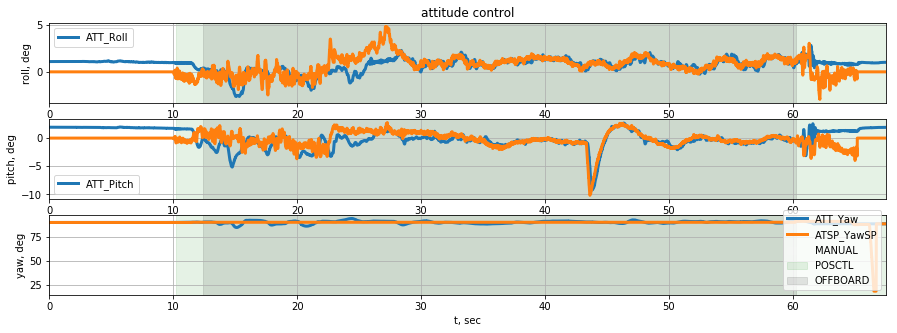

In [52]:
px4tools.plot_attitude_loops(data)
pl.savefig('attitude loops')
pl.legend()

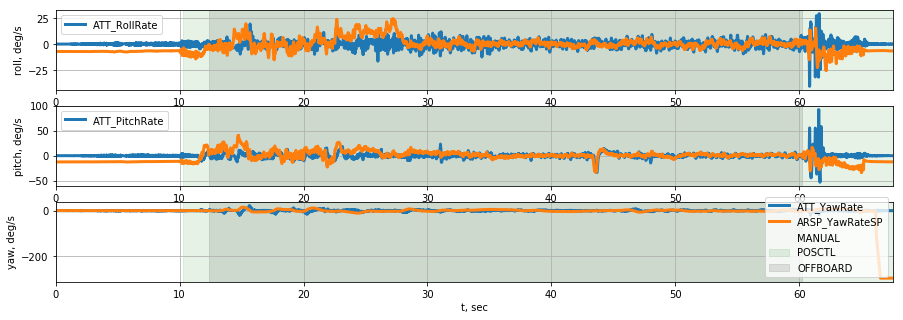

In [53]:
px4tools.plot_attitude_rate_loops(data)
pl.savefig('attitude rate loops')
pl.legend()

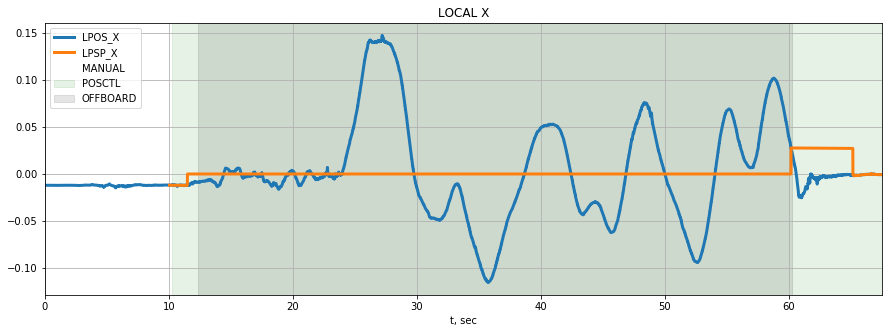

In [54]:
data.LPOS_X.plot()
data.LPSP_X.plot()
background_flight_modes(data)
pl.legend()
pl.grid()
pl.title('LOCAL X')
pl.savefig('LOCAL X')

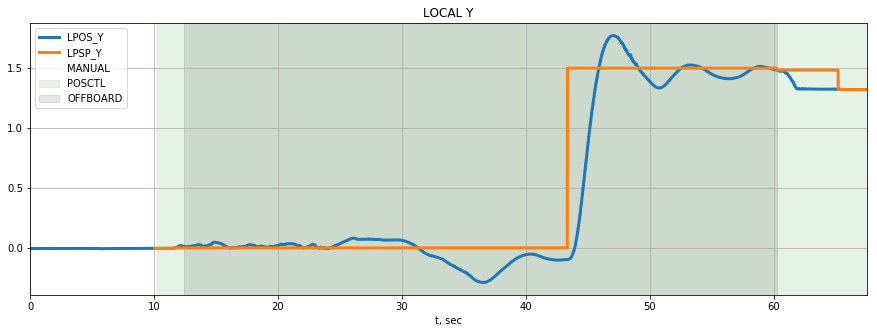

In [55]:
data.LPOS_Y.plot()
data.LPSP_Y.plot()
background_flight_modes(data)
pl.legend()
pl.grid()
pl.title('LOCAL Y')
pl.savefig('LOCAL Y')

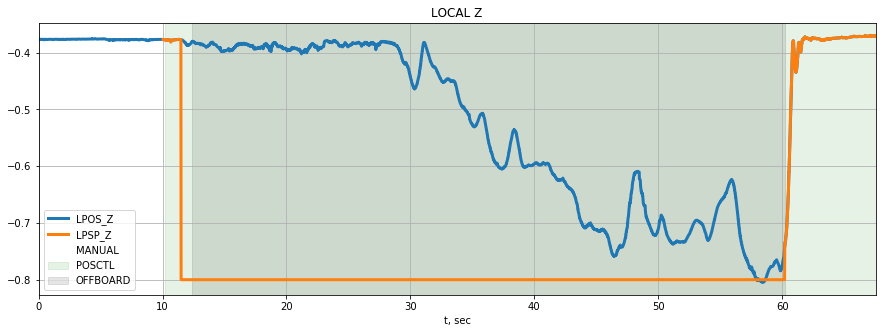

In [56]:
data.LPOS_Z.plot()
data.LPSP_Z.plot()
background_flight_modes(data)
pl.legend()
pl.grid()
pl.title('LOCAL Z')
pl.savefig('LOCAL Z')

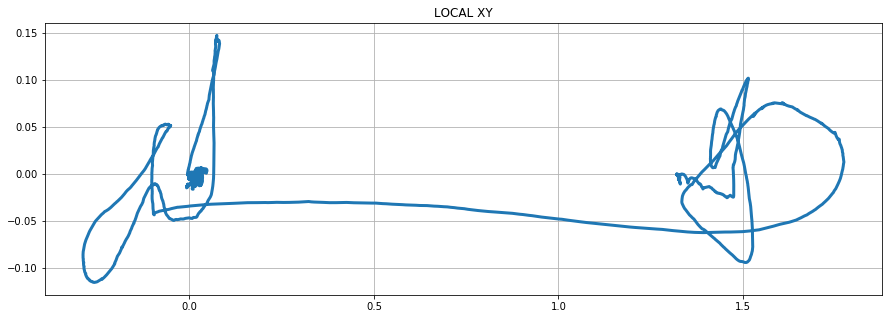

In [57]:
d1 = data.LPOS_X
d2 = data.LPOS_Y
d3 = -1*data.LPOS_Z
d11 = data.LPSP_X
d12 = data.LPSP_Y
d13 = data.LPSP_Z

plt.plot(d2,d1)
pl.grid()
pl.title('LOCAL XY')
pl.savefig('LOCAL XY')
#plt.plot(d1,d11)
#plt.plot(d2,d12)

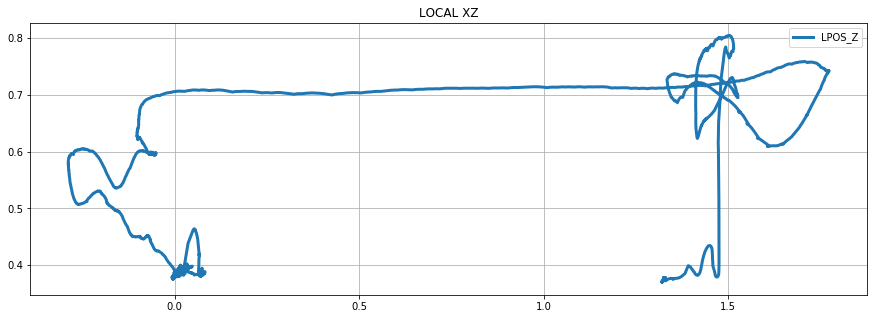

In [58]:
plt.plot(d2,d3)
pl.legend()
pl.grid()
pl.title('LOCAL XZ')
pl.savefig('LOCAL XZ')


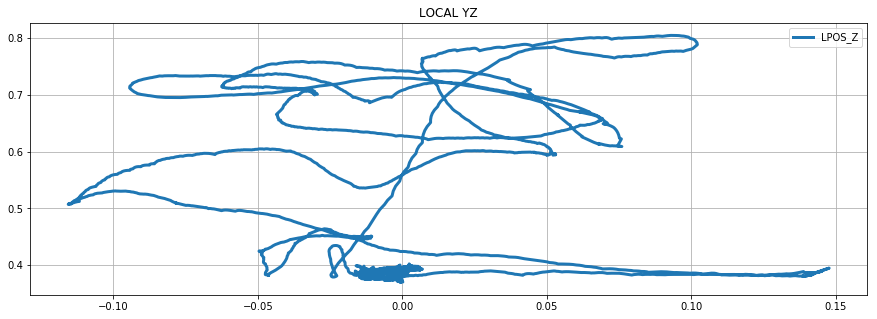

In [59]:
plt.plot(d1,d3)
pl.legend()
pl.grid()
pl.title('LOCAL YZ')
pl.savefig('LOCAL YZ')


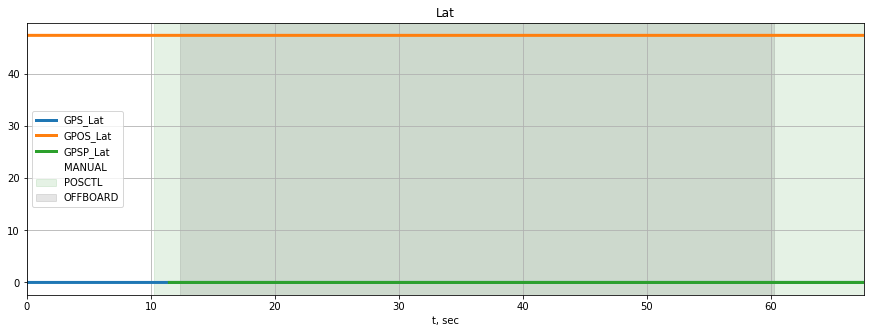

In [60]:
data.GPS_Lat.plot()
data.GPOS_Lat.plot()
data.GPSP_Lat.plot()
background_flight_modes(data)
pl.legend()
pl.grid()
pl.title('Lat')
pl.savefig('Latitude')

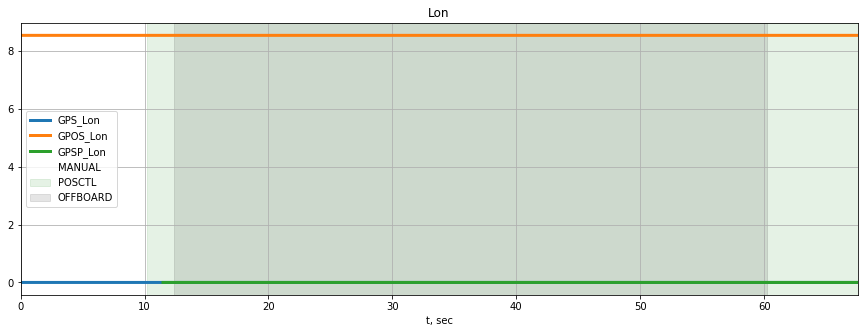

In [61]:
data.GPS_Lon.plot()
data.GPOS_Lon.plot()
data.GPSP_Lon.plot()
background_flight_modes(data)
pl.legend()
pl.grid()
pl.title('Lon')
pl.savefig('Longitude')

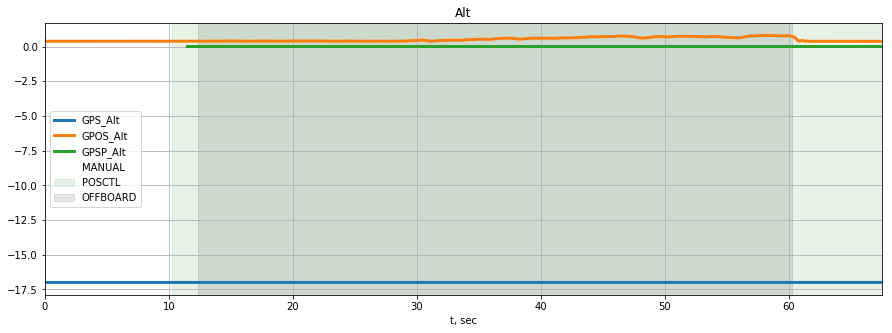

In [62]:
data.GPS_Alt.plot()
data.GPOS_Alt.plot()
data.GPSP_Alt.plot()
background_flight_modes(data)
pl.legend()
pl.grid()
pl.title('Alt')
pl.savefig('Altitude')

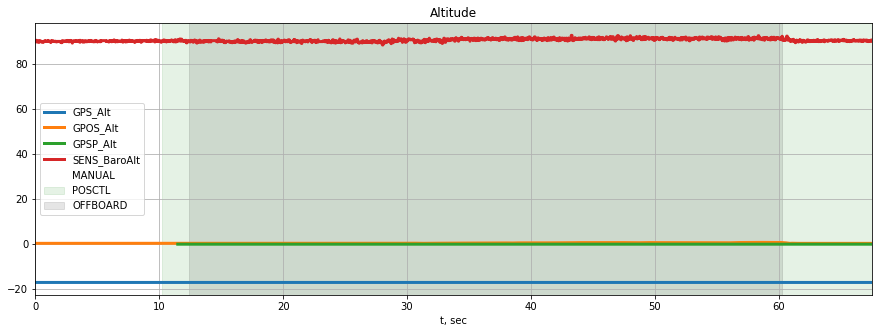

In [63]:
data.GPS_Alt.plot()
data.GPOS_Alt.plot()
data.GPSP_Alt.plot()
data.SENS_BaroAlt.plot()
background_flight_modes(data)
pl.legend()
pl.grid()
pl.title('Altitude')
pl.savefig('GPS_SensBaro')

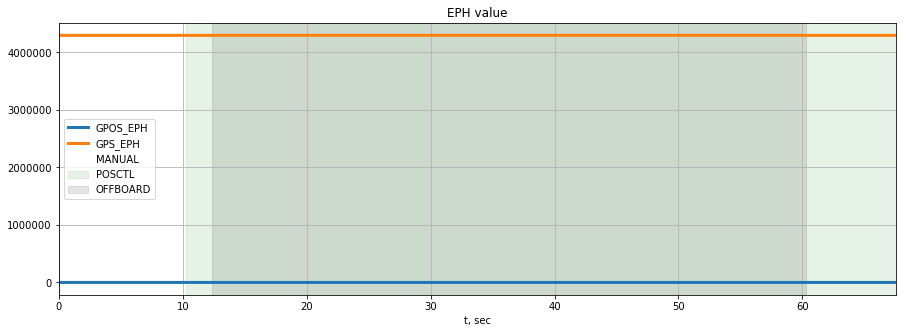

In [64]:
#An hdop value of 1.5 (displayed as 150) or lower is very good.  Over 2.0 (i.e. 200) indicates a bad position value
data.GPOS_EPH.plot()
data.GPS_EPH.plot()
background_flight_modes(data)
pl.legend()
pl.grid()
pl.title('EPH value')
pl.savefig('EPH value')

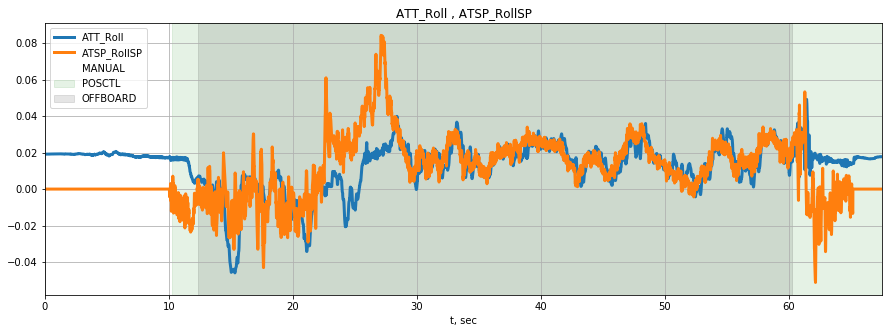

In [65]:
data.ATT_Roll.plot()
data.ATSP_RollSP.plot()
background_flight_modes(data)
pl.legend()
pl.grid()
pl.title('ATT_Roll , ATSP_RollSP')
pl.savefig('Attitude Roll')

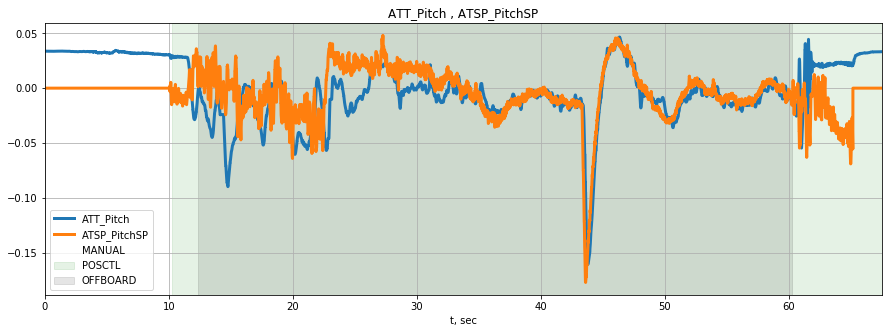

In [66]:
data.ATT_Pitch.plot()
data.ATSP_PitchSP.plot()
background_flight_modes(data)
pl.legend()
pl.grid()
pl.title('ATT_Pitch , ATSP_PitchSP')
pl.savefig('Attitude Pitch')

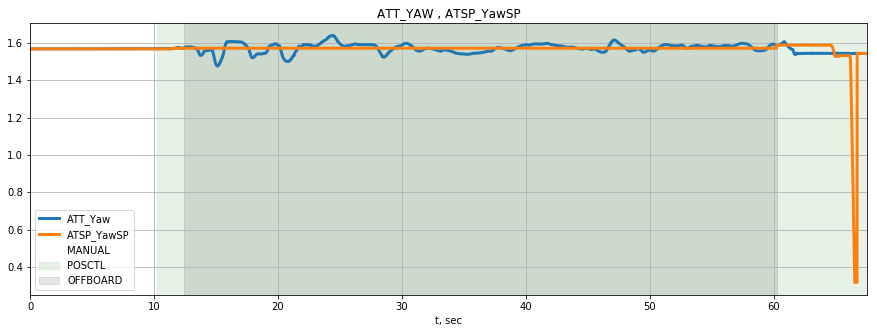

In [67]:
data.ATT_Yaw.plot()
data.ATSP_YawSP.plot()
background_flight_modes(data)
pl.legend()
pl.grid()
pl.title('ATT_YAW , ATSP_YawSP')
pl.savefig('Attitude Yaw')

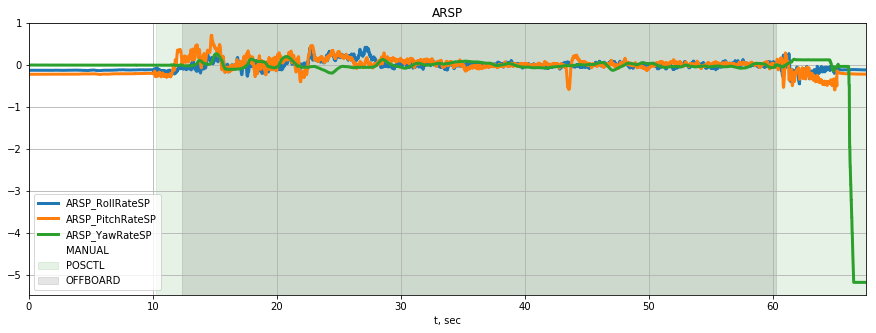

In [68]:
data.ARSP_RollRateSP.plot()
data.ARSP_PitchRateSP.plot()
data.ARSP_YawRateSP.plot()
background_flight_modes(data)
pl.legend()
pl.grid()
pl.title('ARSP')
pl.savefig('ARSP')

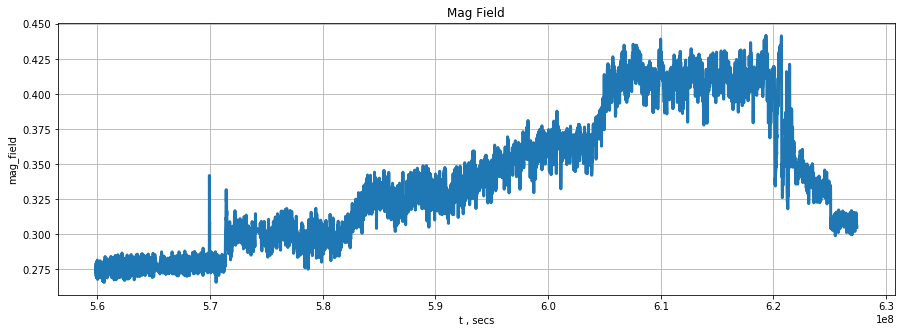

In [69]:
#the values supposed to be between 120~550 (usually it should be 330)
#not sure why for this log it appears like this
mag_field = []
t = []
for count, magx_f in enumerate(data.IMU_MagX.values):
    magF = math.sqrt(float(data.IMU_MagX.values[count])*float(data.IMU_MagX.values[count])+ float(data.IMU_MagY.values[count])*float(data.IMU_MagY.values[count])+ float(data.IMU_MagZ.values[count])*float(data.IMU_MagZ.values[count]))
    mag_field.append(magF) 
    t.append(data.TIME_StartTime.values[count])     

plt.plot(t,mag_field)
pl.xlabel('t , secs')
pl.ylabel('mag_field')
pl.grid()
pl.title('Mag Field')
pl.savefig('Mag Field')
#there is no parameter found for offset, if later we found the offset parameter : offset should be --> [-150;150]

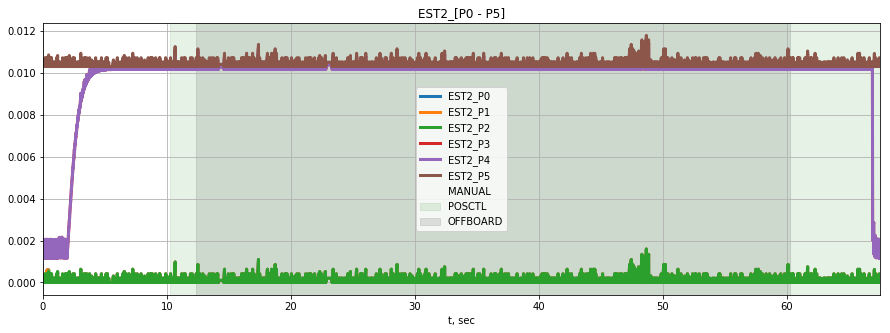

In [70]:
data.EST2_P0.plot()
data.EST2_P1.plot()
data.EST2_P2.plot()
data.EST2_P3.plot()
data.EST2_P4.plot()
data.EST2_P5.plot()
background_flight_modes(data)
pl.legend()
pl.grid()
pl.title('EST2_[P0 - P5]')
pl.savefig('EST2_[P0 - P5]')

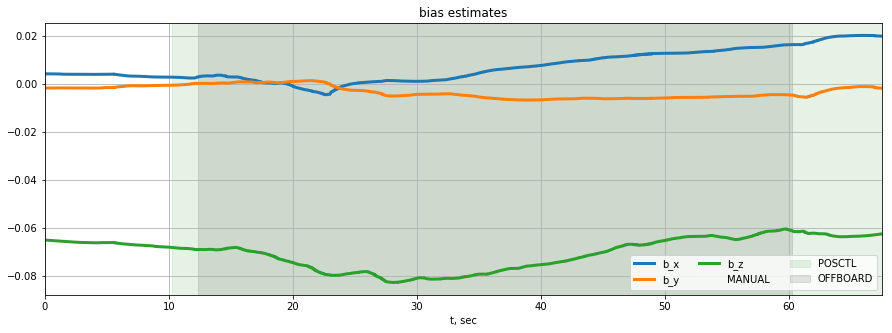

In [71]:
data2 = data
data2.EST0_s6.plot(label='b_x')
data2.EST0_s7.plot(label='b_y')
data2.EST0_s8.plot(label='b_z')
background_flight_modes(data2)
pl.legend(loc='best', ncol=3)
pl.title('bias estimates')
pl.grid()
pl.savefig('bias estimates')

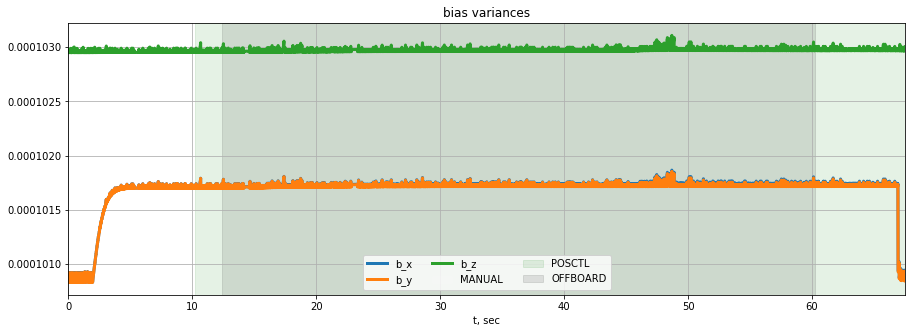

In [72]:
data2.EST2_P6.plot(label='b_x')
data2.EST2_P7.plot(label='b_y')
data2.EST2_P8.plot(label='b_z')
pl.grid()
background_flight_modes(data2)
pl.title('bias variances')
pl.legend(loc='best', ncol=3)
pl.savefig('bias variances')

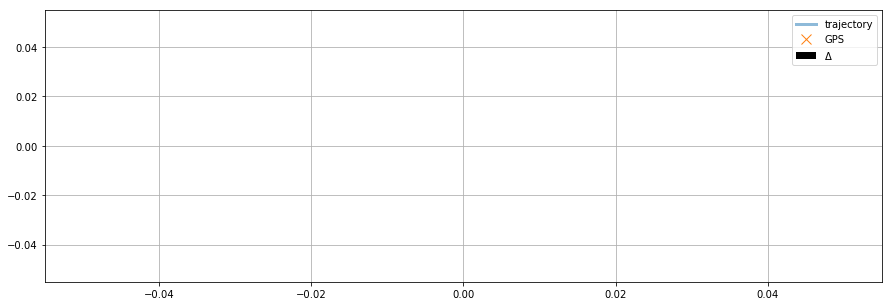

In [73]:
data1 = data_lpe[74:80]
gps_x = px4tools.new_sample(data1.GPS_X)
gps_y = px4tools.new_sample(data1.GPS_Y)
p_x = px4tools.new_sample(data1.LPOS_X)
p_y = px4tools.new_sample(data1.LPOS_Y)
pl.plot(p_y, p_x, label='trajectory', alpha=0.5)
pl.plot(gps_y, gps_x, 'x', label='GPS', markersize=10)
pl.quiver(p_y, p_x, gps_y - p_y, gps_x - p_x, scale_units='xy', scale=1, units='xy', angles='xy', label='$\Delta$')
pl.legend()
pl.grid()
pl.savefig('trajectory_gps')

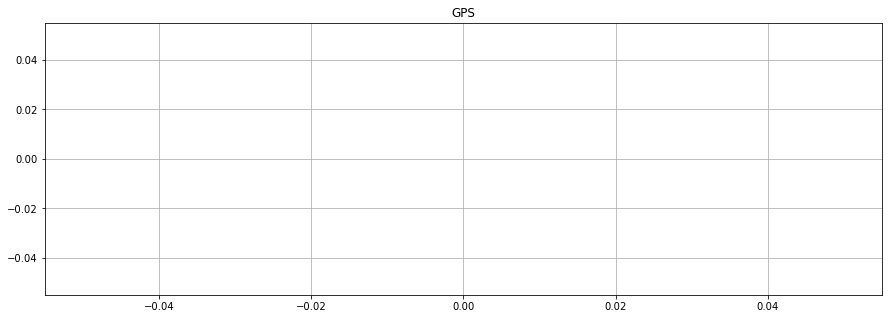

In [74]:
pl.grid()
pl.title('GPS')
pl.plot(gps_y, gps_x, 'o', label='GPS')
pl.savefig('gps')

In [75]:
f_gps_delay = lambda dt, t1, t2, data_lpe: pl.norm(data_lpe.GPS_X[t1:t2] - data_lpe.LPOS_X[t1-dt: t2-dt])
f_gps_delay(0, 70, 80, data_lpe)

0.0

In [76]:
# this a funcationality demonestration of the shifting to be used when graphs are above each other 
'''
pl.plot(data.LPOS_Dist.shift(100));
pl.plot(data.LPOS_Dist.shift(900)); # it shifts the LPOS, not sure why they use it in one of the analysis examples
background_flight_modes(data)
pl.legend()
pl.title('Shift')
'''

"\npl.plot(data.LPOS_Dist.shift(100));\npl.plot(data.LPOS_Dist.shift(900)); # it shifts the LPOS, not sure why they use it in one of the analysis examples\nbackground_flight_modes(data)\npl.legend()\npl.title('Shift')\n"

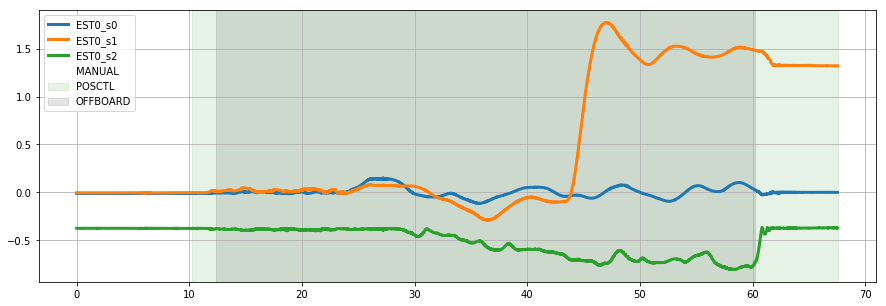

In [77]:
pl.plot(data.EST0_s0)
pl.plot(data.EST0_s1)
pl.plot(data.EST0_s2)
pl.grid()
background_flight_modes(data)
pl.legend()
pl.savefig('est0_s0_s1_s2')

In [78]:
def f_delay(series1, series2, dt):
    d = series2.shift(dt)
    pl.interp(pl.array(series1.index, dtype=float), pl.array(series1.index, dtype=float) + 0.1,
          pl.array(series1, dtype=float))
    dx = series1.shift(dt) - series2.shift(0)
    dx_data = pl.array(dx[pl.isfinite(dx)])
    return pl.norm(dx_data)

In [79]:
pl.interp(pl.array(data.index, dtype=float), pl.array(data.index, dtype=float) + 0.1,
          pl.array(data.LPOS_X, dtype=float))

array([-0.0120134 , -0.0120134 , -0.0120134 , ..., -0.00064137,
       -0.00063375, -0.00061608])

In [80]:
f_delay(data_lpe.LPOS_X, data_lpe.GPS_X, 1)

4.5219989515699828

In [81]:
#requires projected data since (data_lpe)
import scipy.optimize
scipy.optimize.fmin(lambda dt: f_delay(data_lpe.LPOS_X, data_lpe.GPS_X, dt), 0);

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 4
         Function evaluations: 9


/home/kuri/anaconda3/lib/python3.6/site-packages/pandas/core/internals.py:1066: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  new_values[tuple(axis_indexer)] = fill_value


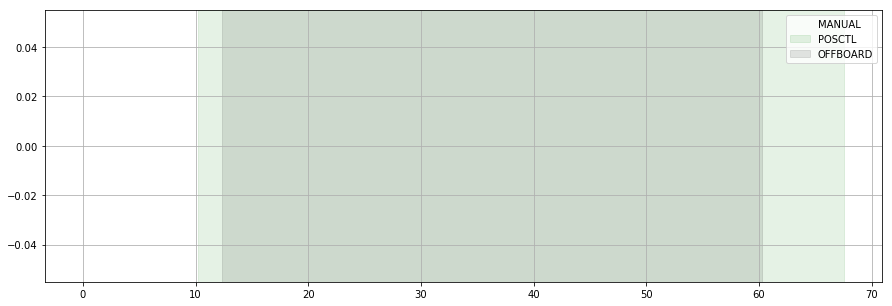

In [82]:
#empty plot (not sure why,maybe because hey want to make that the projection that generates GPS_X,GPS_Y,GPS_Z)
#to be similar to the LPOS ones or not similar
x_gps = data_lpe[['GPS_X', 'GPS_Y', 'GPS_Z', 'GPS_VelN', 'GPS_VelE', 'GPS_VelD']]
x = data_lpe[['LPOS_X', 'LPOS_Y', 'LPOS_Z', 'LPOS_VX', 'LPOS_VY', 'LPOS_VZ']]
dx = x_gps - x
plt.plot(dx[pl.isfinite(dx)])
pl.grid()
background_flight_modes(data)
pl.legend()
pl.savefig('GPS vs Local Position Estimation')

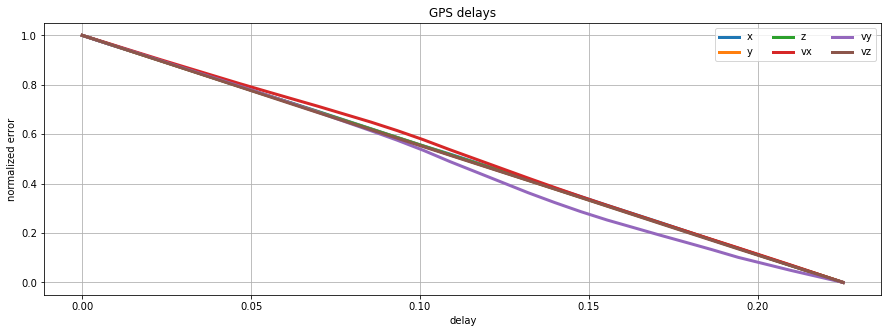

In [83]:
def find_delay(data1, data2, range=pl.arange(-30,30), plot=False, *args, **kwargs):
    dt = pl.mean(pl.diff(pl.array(data1.index)))
    delay_fit = []
    delay_array = pl.arange(0,30)
    for i in delay_array:
        dx = data1 - data2.shift(i)
        delay_fit += [pl.sum( pl.absolute(dx[pl.isfinite(dx)]))]
        
    delay_fit = pl.array(delay_fit)
    delay_fit = delay_fit - delay_fit.min()
    delay_fit = delay_fit / delay_fit.max()
    i_min = pl.argmin(delay_fit)
    if plot:
        pl.plot(dt*delay_array, delay_fit, *args, **kwargs)
    #print i_min, dt
    return i_min*dt




find_delay(data.GPS_Lat, data.LPOS_X, plot=True, label='x')
find_delay(data.GPS_Lon, data.LPOS_Y, plot=True, label='y')
find_delay(data.GPS_Alt, -data.LPOS_Z, plot=True, label='z')
find_delay(data.GPS_VelN, data.LPOS_VX, plot=True, label='vx')
find_delay(data.GPS_VelE, data.LPOS_VY, plot=True, label='vy')
find_delay(data.GPS_VelD, data.LPOS_VZ, plot=True, label='vz')
pl.grid()
pl.legend(loc='best', ncol=3)
pl.ylabel('normalized error')
pl.xlabel('delay')
pl.title('GPS delays')
pl.savefig('GPS delays')

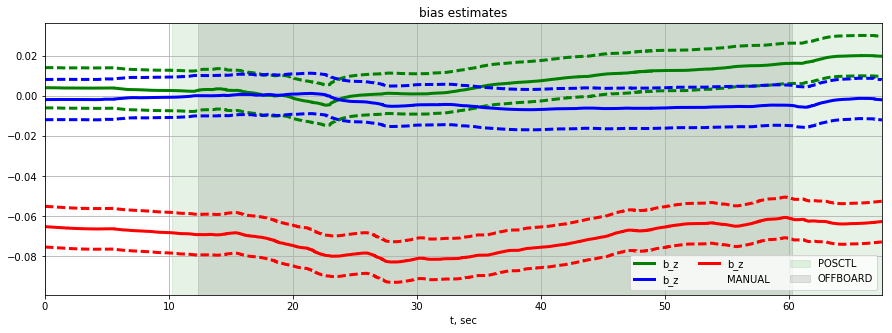

In [84]:
(data.EST0_s6 + pl.sqrt(data.EST2_P6)).plot(label='', color='g', style='--')
(data.EST0_s6 - pl.sqrt(data.EST2_P6)).plot(label='', color='g', style='--')
(data.EST0_s6).plot(label='b_z', color='g')

(data.EST0_s7 + pl.sqrt(data.EST2_P7)).plot(label='', color='b', style='--')
(data.EST0_s7 - pl.sqrt(data.EST2_P7)).plot(label='', color='b', style='--')
(data.EST0_s7).plot(label='b_z', color='b')

(data.EST0_s8 + pl.sqrt(data.EST2_P8)).plot(label='', color='r', style='--')
(data.EST0_s8 - pl.sqrt(data.EST2_P8)).plot(label='', color='r', style='--')
(data.EST0_s8).plot(label='b_z', color='r')

background_flight_modes(data[0:1000])
pl.legend(loc='best', ncol=3)
pl.title('bias estimates')
pl.grid()
pl.savefig('bias estimates 2')

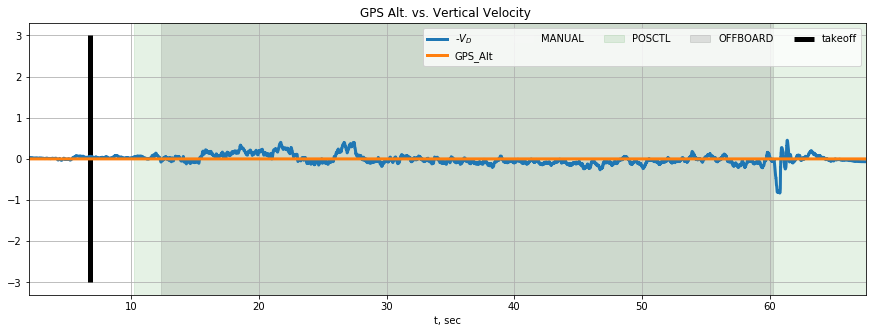

In [85]:
data1 = data[2:100]
(-1*data1.LPOS_VZ).plot(label='-$V_D$')
#(-1*(data1.IMU1_AccZ - data1.IMU1_AccZ.mean())).plot(label='- (AccZ - mean(AccZ))')
(data1.GPS_Alt - data1.GPS_Alt.mean()).plot()
pl.vlines(6.75, -3, 3, label='takeoff', linewidth=5)
background_flight_modes(data1)
pl.legend(loc='best', ncol=5)
pl.title('GPS Alt. vs. Vertical Velocity ')
pl.grid()
pl.savefig('GPS Alt vs Vertical Velocity')

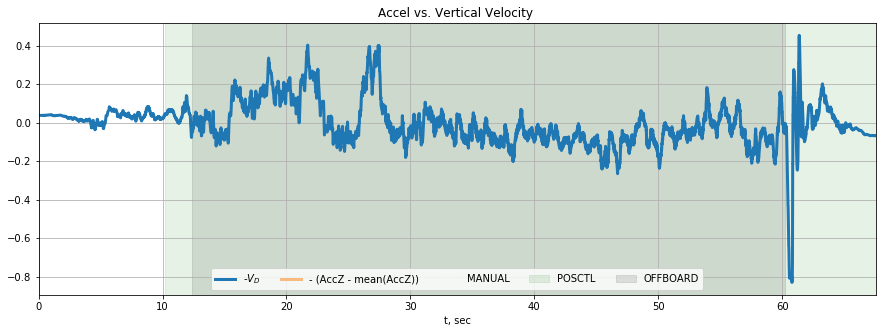

In [86]:
(-1*data.LPOS_VZ).plot(label='-$V_D$')
(-1*(data.IMU1_AccZ - data.IMU1_AccZ.mean())).plot(label='- (AccZ - mean(AccZ))', alpha=0.5)
background_flight_modes(data[0:1000])
pl.legend(loc='best', ncol=5)
pl.title('Accel vs. Vertical Velocity ')
pl.grid()
pl.savefig('Accel vs Vertical Velocity')

In [87]:
find_meas_period(data['LPOS_VX'])

0.010462502169197398

In [88]:
# FOR Additional Information 
#px4tools.process_all(data)

In [89]:
# FOR Additional Information 
#px4tools.project_lat_lon(data)